#      Рынок заведений общественного питания Москвы

## Контекст

Мы проводим исследование рынка общественного питания Москвы для выявления критериев перспективного заведения.

## Задача

Нам необходимо подобрать подходящий тип заведения, определить его общие характеристики, а так же перспективное местоположение.

## План работы

> * Загрузим библиотеки.
> * Загрузим данные о заведениях общественного питания Москвы.
> * Проверим, что тип данных в каждой колонке — корректный, а также пропуски и дубликаты.
> * Обработаем пропуски и дубликаты.
> * Исследуем соотношение видов объектов общественного питания по количеству. Построим график.
> * Исследуем соотношение сетевых и несетевых заведений по количеству. Построим график.
> * Определим для каких объектов общественного питания характерно сетевое распространение.
> * Определим, характерны ли для сетевых заведений следующие характеристики: 
> >  - много заведений с небольшим числом посадочных мест в каждом; 
> >  - мало заведений с большим количеством посадочных мест;
> * Опишем среднее количество посадочных мест для каждого вида объекта общественного питания. 
> * Определим, какой вид предоставляет в среднем самое большое количество посадочных мест. Построим график.
> * Выделим в отдельный столбец информацию об улице из столбца address.
> * Построим график топ-10 улиц по количеству объектов общественного питания. Воспользуемся внешней информацией для ответа на вопрос — в каких районах Москвы находятся эти улицы.
> * Найдем число улиц с одним объектом общественного питания.
> * Подведем итоги и сделаем выводы.

## Описание данных

Данные для анализа таблица rest_data:

> * id — идентификатор объекта;
> * object_name — название объекта общественного питания;
> * chain — сетевой ресторан;
> * object_type — тип объекта общественного питания;
> * address — адрес;
> * number — количество посадочных мест.


## Обзор данных <a id="some_id"></a>

Загрузим библиотеки

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Прочитаем данные из файла

In [8]:
try:
    rest_df = pd.read_csv('/datasets/rest_data.csv')
except:
    rest_df = pd.read_csv('/Users/ivan_miroshnichenko/Downloads/rest_data.csv')

Взглянем на общую информацию

In [9]:
display(rest_df.head(10))
rest_df.info()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


## Предобработка данных

Проверим имеются ли явные дубликаты

In [10]:
rest_df['object_name'] = rest_df['object_name'].str.lower()
print('Количество дубликатов:', rest_df.duplicated().sum())

Количество дубликатов: 0


Проверим на наличие пропусков

In [11]:
print('Количество дубликатов:', rest_df.isna().sum())

Количество дубликатов: id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64


Посмотрим на уникальные значения 'chain' и 'object_type'. Рассмотрим два эти столбца потому что они дают наиболее важные категориальные данные из всей таблицы.

In [18]:
print('Уникальные значения в столбце chain:\n', rest_df['chain'].value_counts())
print('Уникальные значения в столбце object_type:\n', rest_df['object_type'].value_counts())

TypeError: 'numpy.int64' object is not iterable

Из данных видно, что заведения либо сетевые, либо нет. Неявных дубликатов в обоих столбцах не обнаружено. 

Так же важную информацию сообщает нам столбец 'number'. Посмотрим нет ли в нем отрицательных значений.

In [13]:
print('Минимальное количество посадочных мест —', rest_df['number'].min())

Минимальное количество посадочных мест — 0


Посмотрим как этот критерий распределен по типу заведения общественного питания

In [17]:
rest_df[rest_df['number'] == rest_df['number'].min()]['object_type'].value_counts()

предприятие быстрого обслуживания    704
кафе                                 310
закусочная                           189
магазин (отдел кулинарии)            145
кафетерий                            113
буфет                                 68
ресторан                              45
бар                                   28
столовая                              19
Name: object_type, dtype: int64

Видим, что самой большой группой является предприятия быстрого обслуживания, что довольно закономерно.

"Предприятие быстрого обслуживания" - довольно громоздкое название для представления на графиках. Заменим его на "фаст-фуд". 

In [81]:
rest_df.loc[rest_df['object_type']=='предприятие быстрого обслуживания', 'object_type'] = 'фаст-фуд'

Дополнительная обработка данных не требуется. Можем приступить к анализу данных.

## Исследовательский анализ данных

Посмотрим на соотношение видов объектов общественного питания по их количеству. Для этого построим столбчатую диаграмму.

In [82]:
values = rest_df.pivot_table(index='object_type',values='number',aggfunc='count').sort_values(by='number').reset_index()
values.columns = ['type', 'count']

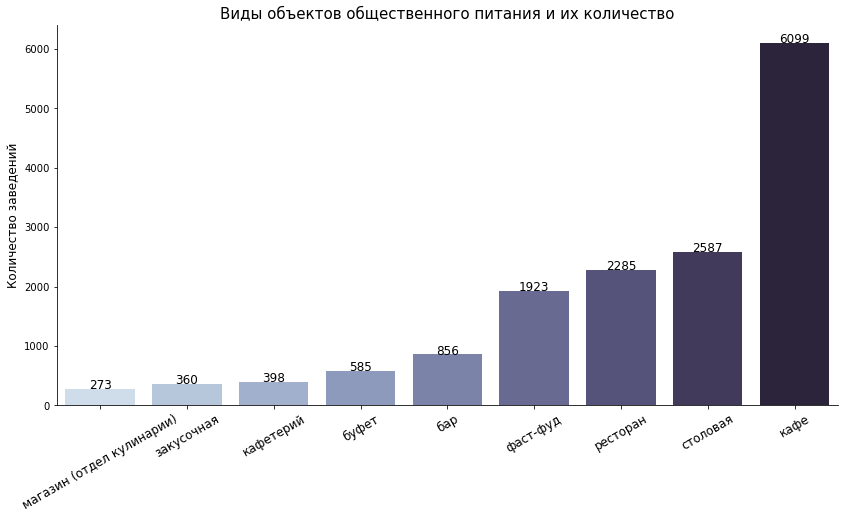

In [83]:
plt.figure(figsize =(14,7))

ax = sns.barplot(data=values, x='type', y='count', palette="ch:s=.2,rot=-.2")
ax.set_xlabel('')
ax.set_ylabel('Количество заведений', size=12)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30, size = 12)
ax.set_title('Виды объектов общественного питания и их количество', size=15)

    

patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()
    ax.annotate(values.iloc[i, 1], (x, y), ha='center', size=12) 
    
sns.despine()

Посмотрим на соотношение сетевых и несетевых заведений по количеству.

Посмотрим детальнее на значения и найдем тип заведений с наибольшим количеством сетевых заведений от общего числа.

In [84]:
values = rest_df.pivot_table(index='object_type', columns='chain', values = 'number', aggfunc = 'count')
values['total']=values['да']+values['нет']
values['percent_of_chain'] = values['да']/values['total'] 

values = values.sort_values(by='percent_of_chain', ascending = False).reset_index()
values['percent_of_chain'] = values['percent_of_chain'].apply(lambda x:'{0:.1f}'.format(x*100)).astype('float')

display(values)



chain,object_type,да,нет,total,percent_of_chain
0,фаст-фуд,791,1132,1923,41.1
1,магазин (отдел кулинарии),78,195,273,28.6
2,ресторан,544,1741,2285,23.8
3,кафе,1396,4703,6099,22.9
4,закусочная,56,304,360,15.6
5,кафетерий,52,346,398,13.1
6,бар,37,819,856,4.3
7,буфет,11,574,585,1.9
8,столовая,3,2584,2587,0.1


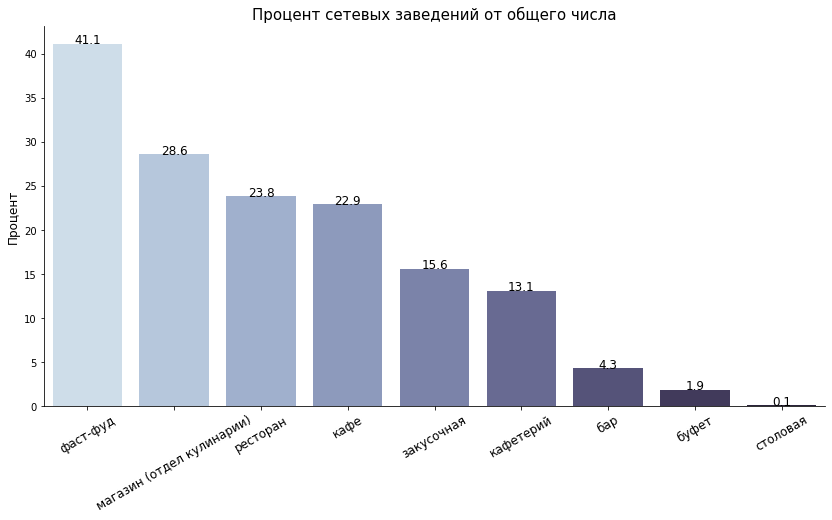

In [85]:
plt.figure(figsize =(14,7))

ax = sns.barplot(data=values, x='object_type', y='percent_of_chain', palette="ch:s=.2,rot=-.2")
ax.set_xlabel('')
ax.set_ylabel('Процент', size=12)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30, size = 12)
ax.set_title('Процент сетевых заведений от общего числа', size=15)

    

patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()
    ax.annotate(values.iloc[i, 4], (x, y), ha='center', size=12) 
    
sns.despine()

Наиболее характерен сетевой формат все таки для заведений фаст-фуд.

Отберем сетевые заведения

In [86]:
chain_rest = rest_df.query('chain == "да"')

Посмотрим на распределение количества посадочных мест по типу заведения.

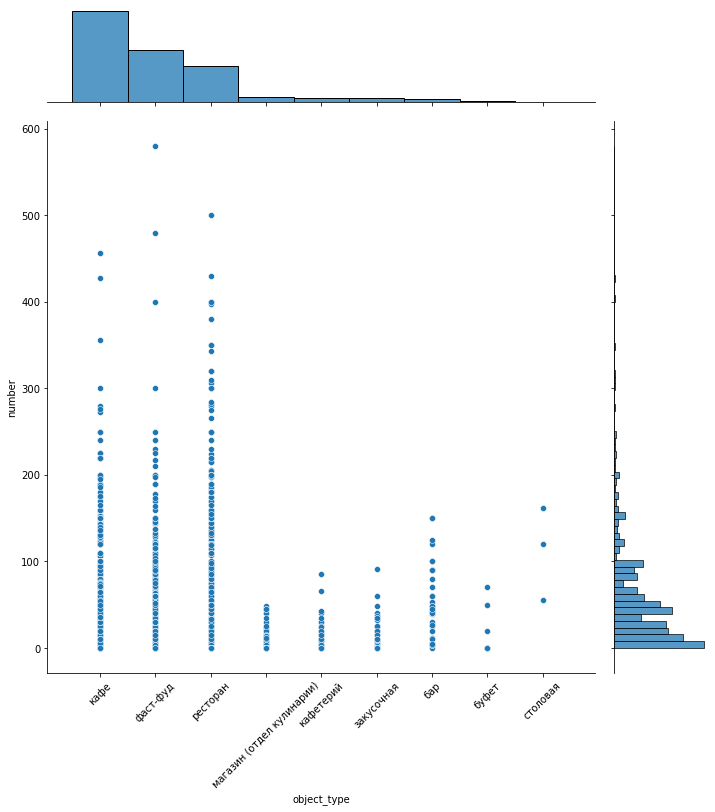

In [87]:
ax = sns.jointplot(x='object_type', y='number', data=chain_rest, height=10 ) ;
for tick in ax.ax_joint.get_xticklabels():         
    tick.set_rotation(45)
    tick.set_size(10)


Видим, что у кафе, фаст-фуда и ресторанов очень широкое распределение от 0 до 200-300 мест.

Взглянем на среднее количество посадочных мест по типу заведения

In [88]:
mean_numb = rest_df.pivot_table(index='object_type', values = 'number', aggfunc = 'mean').sort_values(by='number', ascending=False).reset_index()
mean_numb.columns = ['type', 'average']
display(mean_numb)

,type,average
0,столовая,130.246618
1,ресторан,96.834136
2,буфет,51.129915
3,бар,43.494159
4,кафе,39.716019
5,фаст-фуд,20.552262
6,кафетерий,9.123116
7,закусочная,7.608333
8,магазин (отдел кулинарии),5.589744


Здесь мы видим, что у столовых и ресторанов почти в несколько раза больше посадочных мест, чем у баров, буфетов, кафе и фаст-фуда. Для наглядности построим график.

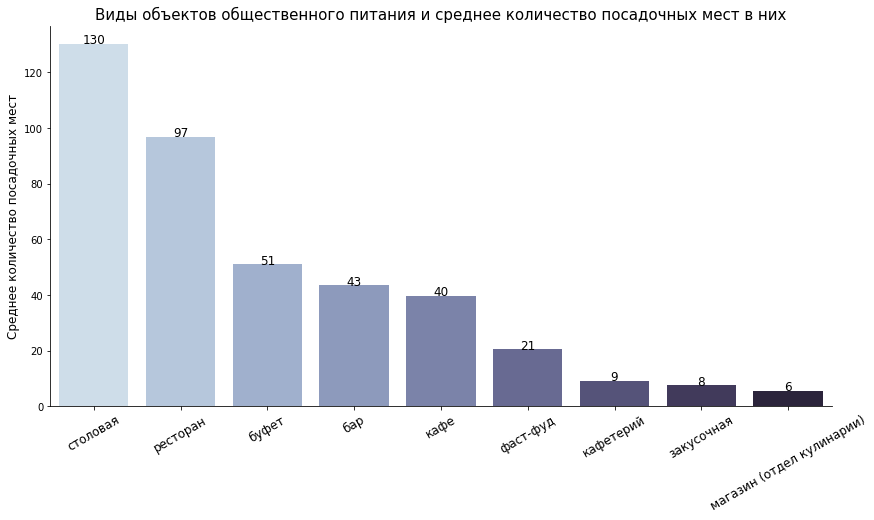

In [89]:
plt.figure(figsize =(14,7))

ax = sns.barplot(data=mean_numb, x='type', y='average', palette="ch:s=.2,rot=-.2")
ax.set_xlabel('')
ax.set_ylabel('Среднее количество посадочных мест', size=12)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30, size = 12)
ax.set_title('Виды объектов общественного питания и среднее количество посадочных мест в них', size=15)

    

patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()
    ax.annotate('{0:.0f}'.format(mean_numb.iloc[i, 1]), (x, y), ha='center', size=12) 
    
sns.despine()

/Users/ivan_miroshnichenko/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ivan_miroshnichenko/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


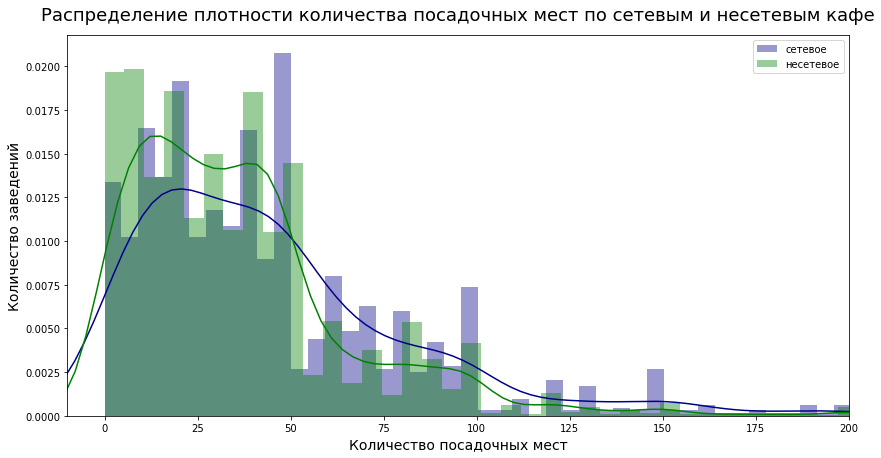

In [90]:
plt.figure(figsize =(14,7))

ax = sns.distplot(rest_df.query('chain == "да" & object_type == "кафе"')['number'],
                  bins=100,
                  color='darkblue',
                  label='сетевое') 
ax = sns.distplot(rest_df.query('chain == "нет" & object_type == "кафе"')['number'],
                  bins=100,
                  color='green',
                  label='несетевое')
ax.set_title("Распределение плотности количества посадочных мест по сетевым и несетевым кафе",
             fontsize=18,
             pad = 15)
ax.set_xlabel("Количество посадочных мест", fontsize=14)
ax.set_ylabel("Количество заведений", fontsize=14)
plt.legend()
plt.xlim(-10, 200)
plt.show()

Выделим из адреса заведения название улицы на которой оно находится. Для этого используем регулярное выражение и метод extract.

In [91]:
pattern='\,((.+)?(улица|переулок|шоссе|бульвар|проспект|набережная|площадь|проезд|аллея|тупик)(.+)?)\,'
rest_df['street'] = rest_df['address'].str.extract(pat=pattern)[0]

В некоторых строках у нас сохранилась наименование 'дом' и его номер, уберем такие выражения методом split.

In [92]:
rest_df['street']=rest_df['street'].apply(lambda x: str(x).split(",")[0])
rest_df['street']=rest_df['street'].apply(lambda x: str(x).strip())

Приведем названия улиц к нижнему регистру.

In [93]:
rest_df['street'] = rest_df['street'].astype('str')

In [94]:
rest_df['street']

0         улица Егора Абакумова
1              улица Талалихина
2          Абельмановская улица
3            Абрамцевская улица
4            Абрамцевская улица
                  ...          
15361    3-й Крутицкий переулок
15362        улица Земляной Вал
15363        улица Земляной Вал
15364      поселение Московский
15365         Ходынский бульвар
Name: street, Length: 15366, dtype: object

Импортируем датасет с данными о районах Москвы и соответсвии улицам.

In [95]:
area = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTeFkOKTdPNtNO_6XogdSqpfsTReMnsp6spRIrnMsg3kte4bseSVCJYu3_T_MCkX-X_YlkxAGzY1SCu/pub?output=csv')
area.columns = ['street','area_id', 'okrug', 'area']
area.head()

,street,area_id,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


Добавим информацию о районах в начальный датафрейм.

In [96]:
rest_df = rest_df.merge(area[['street', 'area']], on='street', how='left')
rest_df.head(50)

,id,object_name,chain,object_type,address,number,street,area
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,Ярославский Район
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,Таганский район
2,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,Нижегородский район
3,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,Район Южное Бутово
4,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,Таганский район
5,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,Район Лианозово
6,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица,Район Лианозово
7,27429,стол. при гоу сош № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240,Абрамцевская улица,Район Лианозово
8,148815,брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,переулок Сивцев Вражек,Район Арбат
9,148815,брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,переулок Сивцев Вражек,Район Хамовники


Создадим сводную таблицу в которую войдут десять улиц Москвы с наибольшим количеством заведений, а также информация о районах через которые проходят эти улицы.

In [97]:
top_street = rest_df.pivot_table(index=['street', 'area'], values='id', aggfunc='count').reset_index().sort_values('id', ascending=False).reset_index()
top_street = top_street.rename(columns = {'id':'count'})
top_street = top_street.groupby('street').agg({'area': 'unique', 'count':'median'}).reset_index().sort_values(by='count', ascending = False)
top_street = top_street.reset_index(drop=True)
top_ten_street = top_street.head(10)
top_ten_street

,street,area,count
0,проспект Мира,"[Алексеевский район, Ярославский Район, Мещанс...",204.0
1,Профсоюзная улица,"[Район Теплый Стан, Обручевский район, Академи...",182.0
2,Ленинградский проспект,"[Район Аэропорт, Район Беговой, Район Сокол, Х...",171.0
3,Пресненская набережная,[Пресненский район],167.0
4,Варшавское шоссе,"[Район Чертаново Центральное, Район Нагатино-С...",161.0
5,Ленинский проспект,"[Район Теплый Стан, Район Тропарево-Никулино, ...",147.0
6,проспект Вернадского,"[Район Тропарево-Никулино, Район Раменки, Райо...",132.0
7,Кутузовский проспект,"[Район Дорогомилово, Район Фили-Давыдково]",114.0
8,Каширское шоссе,"[Район Москворечье-Сабурово, Район Нагатино-Са...",112.0
9,Кировоградская улица,"[Район Чертаново Центральное, Район Чертаново ...",110.0


Построим столбчатую диаграмму по полученным данным. 

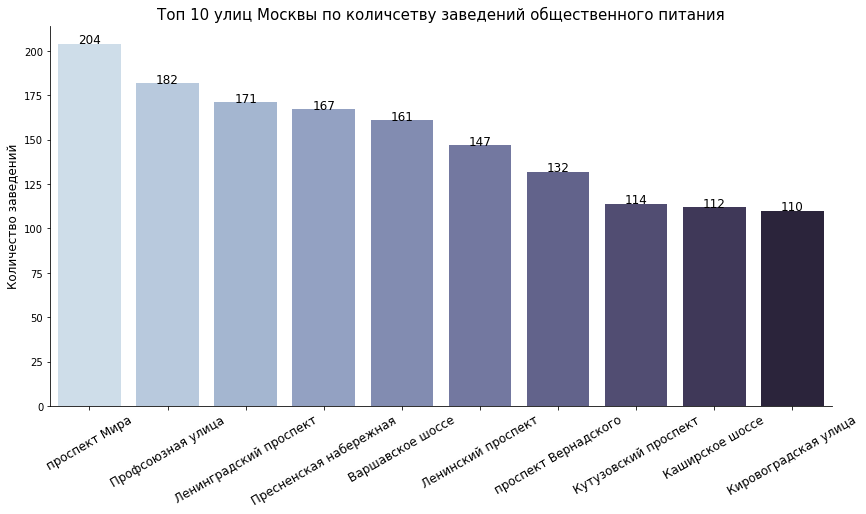

In [98]:
plt.figure(figsize =(14,7))

ax = sns.barplot(data=top_ten_street, x='street', y='count', palette="ch:s=.2,rot=-.2")
ax.set_xlabel('')
ax.set_ylabel('Количество заведений', size=12)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30, size = 12)
ax.set_title('Топ 10 улиц Москвы по количсетву заведений общественного питания', size=15)

    

patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()
    ax.annotate('{0:.0f}'.format(top_ten_street.iloc[i, 2]), (x, y), ha='center', size=12) 
    
sns.despine()


Больше всего заведений на проспекте Мира. Остальные немного уступают, но в среднем имеют схожие значения. Почти все улицы представленные в выборке крупные транспортные магистрали, кроме Пресненкой набережной.

Посмотрим какие представляют наибольшее число заведений.

In [99]:
top_ten_district = rest_df.pivot_table(index=['area'], values='id', aggfunc='count')
top_ten_district = top_ten_district.sort_values(by='id', ascending = False).rename(columns = {'id':'count'}).reset_index()
top_ten_district = top_ten_district.head(10)

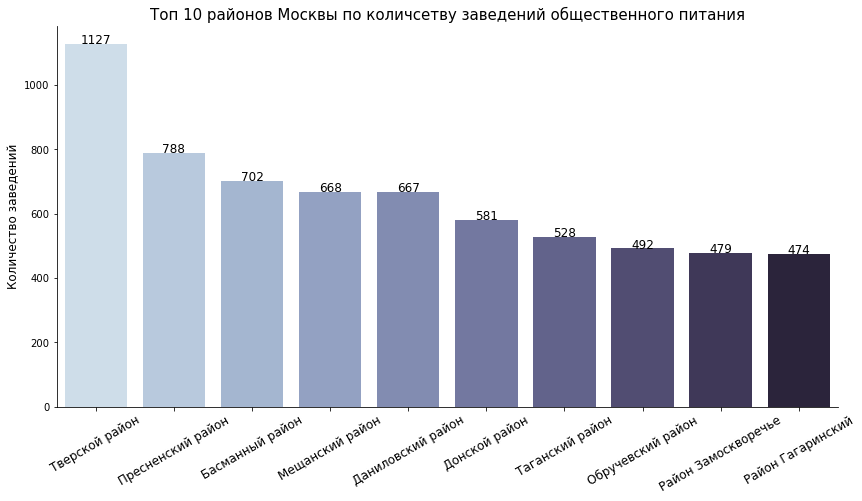

In [100]:
plt.figure(figsize =(14,7))

ax = sns.barplot(data=top_ten_district, x='area', y='count', palette="ch:s=.2,rot=-.2")
ax.set_xlabel('')
ax.set_ylabel('Количество заведений', size=12)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30, size = 12)
ax.set_title('Топ 10 районов Москвы по количсетву заведений общественного питания', size=15)

    

patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()
    ax.annotate('{0:.0f}'.format(top_ten_district.iloc[i, 1]), (x, y), ha='center', size=12) 
    
sns.despine()

Больше всего заведений в центре: в Тверском, Пресненском и Басманном районе.

Найдем количество улиц, где есть всего одно заведение.

In [101]:
one_place_group = top_street.query('count == 1')
print('Число улиц с одним заведением общественного питания — ', one_place_group.shape[0])

Число улиц с одним заведением общественного питания —  509


Таких 509 наименований.

In [102]:
bottom_ten_street = rest_df.pivot_table(index=['area', 'street'], values='id', aggfunc='count').query('id == 1').sort_values('id', ascending=False).reset_index()
bottom_ten_street = bottom_ten_street.rename(columns = {'id':'count'})
bottom_ten_street = bottom_ten_street.groupby('area').agg({'street': 'unique', 'count':'sum'}).sort_values(by='count', ascending = False).reset_index()
bottom_ten_street = bottom_ten_street.head(10)
bottom_ten_street

,area,street,count
0,Таганский район,"[Яузский бульвар, Сибирский проезд, Средняя Ка...",27
1,Район Хамовники,"[2-й Неопалимовский переулок, 1-й Зачатьевский...",26
2,Басманный район,"[Малый Казённый переулок, Госпитальный переуло...",25
3,Тверской район,"[1-я Миусская улица, 2-й Колобовский переулок,...",20
4,Пресненский район,"[Красногвардейский бульвар, Гранатный переулок...",19
5,Район Марьина роща,"[Минаевский переулок, 3-й Стрелецкий проезд, 5...",18
6,Район Арбат,"[Проточный переулок, Денежный переулок, Калоши...",17
7,Мещанский район,"[Большой Кисельный переулок, 1-й Коптельский п...",16
8,Район Замоскворечье,"[Средний Овчинниковский переулок, Черниговский...",14
9,Район Лефортово,"[улица Лефортовский Вал, улица Лапина, Шепелюг...",12


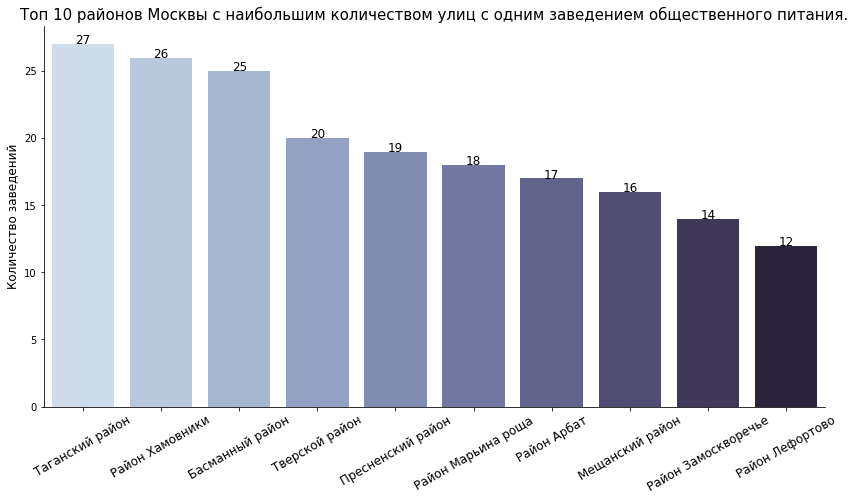

In [103]:
plt.figure(figsize =(14,7))

ax = sns.barplot(data=bottom_ten_street, x='area', y='count', palette="ch:s=.2,rot=-.2")
ax.set_xlabel('')
ax.set_ylabel('Количество заведений', size=12)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30, size = 12)
ax.set_title('Топ 10 районов Москвы с наибольшим количеством улиц с одним заведением общественного питания.', size=15)

    

patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()
    ax.annotate('{0:.0f}'.format(bottom_ten_street.iloc[i, 2]), (x, y), ha='center', size=12) 
    
sns.despine()

Представлены как центральные районы так и окраины. Центральные районы фигурируют чаще в силу их меньшего числа и большей концентрации заведений.

## Вывод

Мы провели исследование рынка заведений общественного питания в Москве.

Данные были предварительно подготовлены, поэтому предобработка нам не потребовалась.

Наиболее популярны в Москве - `кафе`, их `6,1 тысяч`. `Сетевые кафе` не самый популярный формат, они составляют всего `23%` от общего числа. Среднее значение посадочных мест в заведениях общепита - `50`.

Наиболее популярным сетевой формат считается в заведениях `фаст-фуд`, он составляет `41,1%`. На втором месте — `отделы кулинарий` в магазинах у них `29%`.

Сетевые заведения чаще имеют большое количество точек и малое количество посадочных мест или вовсе их не имеют.

Наибольшее число посадочных мест наблюдаем у столовых и ресторанов. Среднее количество мест в кафе - `39`. Среднее количество мест в ресторане - `97`. Столовые, в среднем, имеют около `130`мест.

Больше всего заведений на `Ленинградском проспекте`, `Профсоюзной улице` и `проспекте Мира`. По районам больше всего заведений в центре: в `Тверском`, `Басманном` и `Пресненском районе`.

По районам больше всего заведений с одним заведением на улице так же в центре: в `Таганском`, `Басманном` и районе `Хамовники`. Всего одно заведение общепита есть на 509 улицах.

# Итог

Текущий анализ рынка показывает, что `кафе наиболее перспективный тип заведения` и популярен в Москве. Однако, для наиболее точного прогноза необходима информация об экономической деятельности каждого типа заведения.




Презентация: https://drive.google.com/file/d/1FdDwJyKFfPpb9Om8bwCTqFuM-wCoebOm/view?usp=sharing